In [1]:
#Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from textblob import TextBlob


In [3]:
df = pd.read_csv("robertabased_with_sentiment_12th.csv")

In [4]:
df.head()

,id,text,date,rating,sentiment_numeric,sentiment_description
0,R1ESZAVO5HT8A2,15k is very low price for an i3. 15.1k should ...,Reviewed in India on 21 October 2022,1.0 out of 5 stars,1,Neutral
1,RMJA9SC2YBECP,Works great out the box and super quiet cooler.,Reviewed in the United Kingdom on 24 October 2023,5.0 out of 5 stars,2,Positive
2,R3FZ8UCS4F1UYS,This is a great processor that can handle just...,Reviewed in the United States on 22 May 2024,5.0 out of 5 stars,2,Positive
3,R19D7MER1FD3JA,I bought this processor to be able to© put it ...,Reviewed in France on 25 August 2023,5.0 out of 5 stars,2,Positive
4,RKZDIQAT08HD2,12100 is a great CPU because Intel did bust a ...,Reviewed in Canada on 31 May 2024,5.0 out of 5 stars,2,Positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     1050 non-null   object
 1   text                   1050 non-null   object
 2   date                   1050 non-null   object
 3   rating                 1050 non-null   object
 4   sentiment_numeric      1050 non-null   int64 
 5   sentiment_description  1050 non-null   object
dtypes: int64(1), object(5)
memory usage: 49.3+ KB


In [6]:
df.shape

(1050, 6)

In [7]:
df.isnull().sum()

id                       0
text                     0
date                     0
rating                   0
sentiment_numeric        0
sentiment_description    0
dtype: int64

In [8]:
numeric_stats = df.describe()
print(numeric_stats)

       sentiment_numeric
count        1050.000000
mean            1.597143
std             0.678269
min             0.000000
25%             1.000000
50%             2.000000
75%             2.000000
max             2.000000


In [9]:
#Processing the date column and rating column for analysis

In [10]:
# Function to extract the year from the date string
def extract_year(date_str):
    match = re.search(r'\d{4}', date_str)
    return match.group(0) if match else None

# Apply the function to the 'date' column
df['date'] = df['date'].apply(extract_year)

df['date'] = df['date'].astype(float)

In [11]:
# Function to extract the numerical rating from the rating string
def extract_rating(rating_str):
    # Use regex to find the numerical rating
    rating_match = re.search(r'(\d+\.\d+)', rating_str)
    if rating_match:
        return float(rating_match.group(1))
    return None

# Apply the function to the 'rating' column
df['rating'] = df['rating'].apply(extract_rating)

In [12]:
df.head()

,id,text,date,rating,sentiment_numeric,sentiment_description
0,R1ESZAVO5HT8A2,15k is very low price for an i3. 15.1k should ...,2022.0,1.0,1,Neutral
1,RMJA9SC2YBECP,Works great out the box and super quiet cooler.,2023.0,5.0,2,Positive
2,R3FZ8UCS4F1UYS,This is a great processor that can handle just...,2024.0,5.0,2,Positive
3,R19D7MER1FD3JA,I bought this processor to be able to© put it ...,2023.0,5.0,2,Positive
4,RKZDIQAT08HD2,12100 is a great CPU because Intel did bust a ...,2024.0,5.0,2,Positive


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1050 non-null   object 
 1   text                   1050 non-null   object 
 2   date                   1050 non-null   float64
 3   rating                 1050 non-null   float64
 4   sentiment_numeric      1050 non-null   int64  
 5   sentiment_description  1050 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 49.3+ KB


In [14]:
#Bivariate Analysis

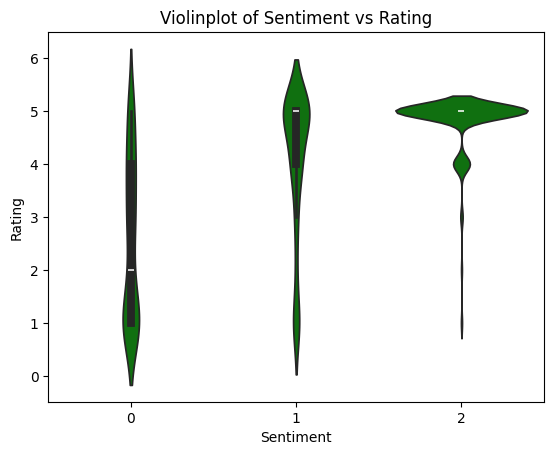

In [15]:
#Violin Plot
sns.violinplot(data = df, x='sentiment_numeric', y='rating',color='green')
plt.title('Violinplot of Sentiment vs Rating')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.show()

In [16]:
# Here, we can see that negative(0) sentiment is having thicker distribution between 0 and 1, indicating that the negative comments have higher concentration of rating between those values. Similarly, positive sentiments have higher concentration of 5 star ratings and very narrow lower end. Neutral sentiments have ratings distributed  more around 4 to 5 and less around 2-3.

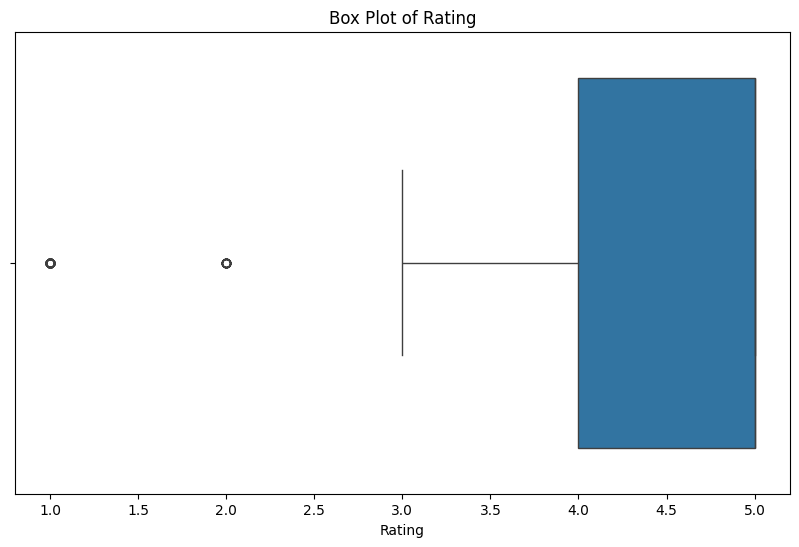

In [17]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['rating'])
plt.title('Box Plot of Rating')
plt.xlabel('Rating')
plt.show()


In [18]:
correlation_matrix = df[['rating', 'sentiment_numeric']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                     rating  sentiment_numeric
rating             1.000000           0.619032
sentiment_numeric  0.619032           1.000000


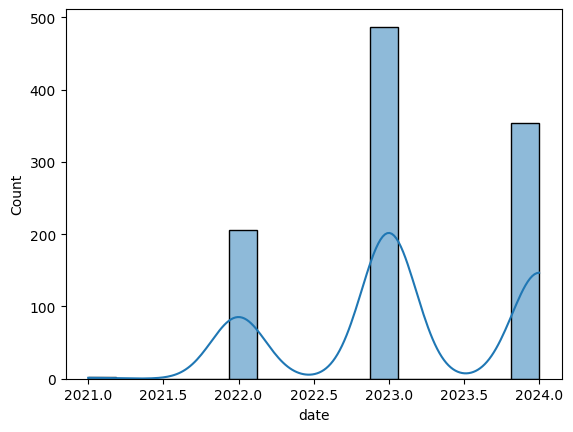

In [19]:
cht1 = sns.histplot(data=df,x='date',kde=True)
plt.show()


In [20]:
#  this plot gives a visual representation of the distribution of years in the dataset, along with an estimate of the density of occurrences over those dates. We can see that the year 2023 has more reviews lodged.

In [21]:
# Analysing Sentiment Score over the years

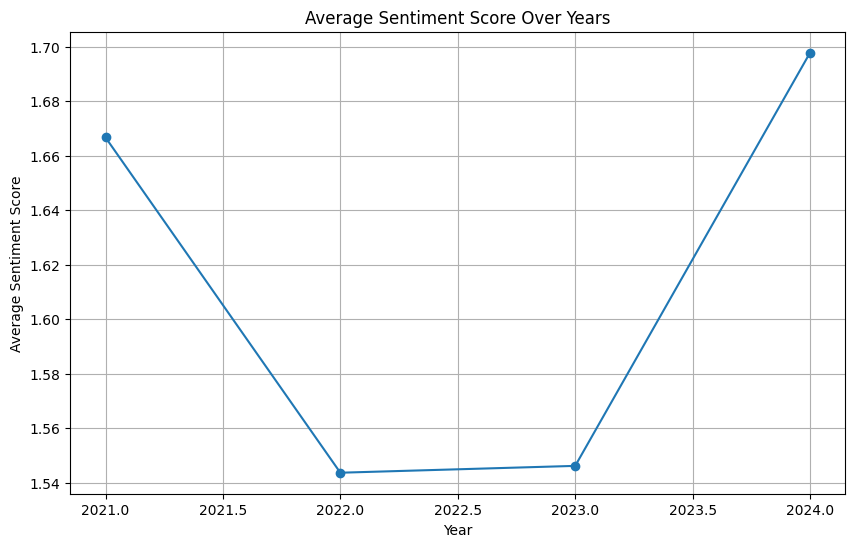

In [22]:
df['year'] = pd.to_datetime(df['date'], format='%Y')

# Step 4: Aggregate the Data
# Group by year and calculate the average sentiment score for each year
yearly_sentiment = df.groupby(df['year'].dt.year)['sentiment_numeric'].mean().reset_index()

# Step 5: Visualization
plt.figure(figsize=(10, 6))
plt.plot(yearly_sentiment['year'], yearly_sentiment['sentiment_numeric'], marker='o')
plt.title('Average Sentiment Score Over Years')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()

In [23]:
# The above plot shows the change in average sentiment score over each year. Here, we can see that the sentiments were positive on an average in the year 2021, and went to being less positive and towards neutral between 2022 to 2023, having a positive phase again in 2023-2024. This might indicate that there is a positive sentiment being developed towards the latest years. This may be attributed to the newest processors being introduced and the improvements being made. To confirm this inference, analysis should be done individually on each product and reviews from upcoming months should be updated.

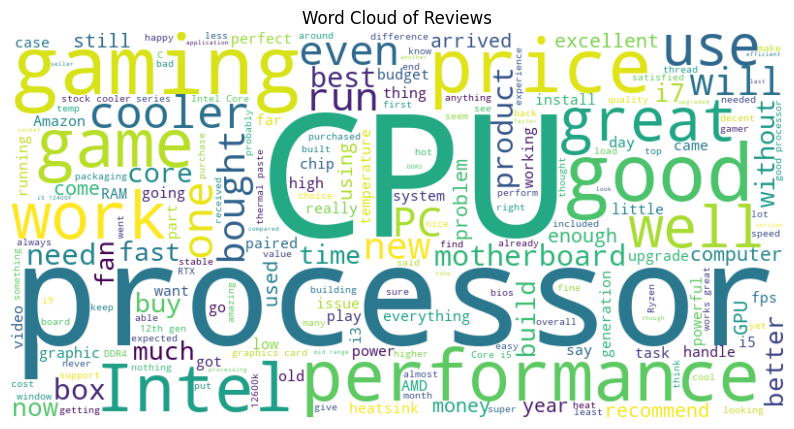

In [24]:
from wordcloud import WordCloud

# Combine all review texts
all_reviews = ' '.join(df['text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


In [25]:
#In the word cloud, larger words indicate that they appear more often. Here the word CPU, Processor, Price and Gaming are some of the key themes of user reviews. This gives us an idea that users sentiments are focused on these themes.

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
text_vectorized = vectorizer.fit_transform(df['text'])

# Perform LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(text_vectorized)

# Display the top words for each topic
words = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print(" ".join([words[i] for i in topic.argsort()[-10:]]))
    print()


Topic 1:
arrived great motherboard box gaming works cooler good cpu processor

Topic 2:
intel value performance excellent games price gaming processor cpu good

Topic 3:
high use great cooler price graphics gaming performance cpu processor

Topic 4:
cooler box performance good used intel price gaming processor cpu

Topic 5:
i7 price intel gaming pc performance good great processor cpu



In [27]:
# Topic 1 seems to focus on aspects of product delivery and initial impressions. Terms like "arrived," "box," and "cooler" suggest discussions around unboxing and the physical state or packaging of products, particularly related to gaming components such as motherboards and CPUs. Topic 2 is likely centered around the performance and value of Intel products. Words like "performance," "value," "excellent," and "price" indicate that reviews under this topic focus on how well Intel products perform, their cost-effectiveness, and their suitability for gaming. Topic 3 seems to address the performance and usage of products, especially in gaming. Topic 4 discuss the condition and performance of products. Topic 5 focused on Intel’s i7 processors. Words like "i7," "price," "performance," and "gaming" indicate that reviews are centered around Intel i7 processors, evaluating their performance, pricing, and suitability for gaming. 

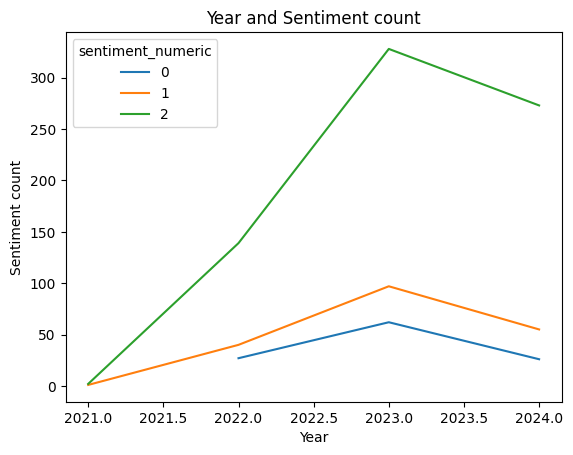

In [28]:
df.groupby(['date','sentiment_numeric'])['sentiment_numeric'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

In [29]:
#All the sentiment counts have a high peak around the year 2023, this could be due to the earlier inference that there are higher number of reviews logged in the year 2023. 
#There is a steady increase in the count of positive sentiments till 2023.

In [30]:
df['polarity'] = df['text'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['text'].astype(str).apply(len)
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

In [31]:
#Polarity quantifies the sentiment of a text on a continuous scale ranging from -1 to 1. 
# -1: Represents extreme negative sentiment.
# 0: Represents neutral sentiment (no strong emotion).
# 1: Represents extreme positive sentiment.

In [32]:
df.head()

,id,text,date,rating,sentiment_numeric,sentiment_description,year,polarity,review_len,word_count
0,R1ESZAVO5HT8A2,15k is very low price for an i3. 15.1k should ...,2022.0,1.0,1,Neutral,2022-01-01,0.125000,152,31
1,RMJA9SC2YBECP,Works great out the box and super quiet cooler.,2023.0,5.0,2,Positive,2023-01-01,0.377778,47,9
2,R3FZ8UCS4F1UYS,This is a great processor that can handle just...,2024.0,5.0,2,Positive,2024-01-01,0.025000,209,38
3,R19D7MER1FD3JA,I bought this processor to be able to© put it ...,2023.0,5.0,2,Positive,2023-01-01,0.600000,332,62
4,RKZDIQAT08HD2,12100 is a great CPU because Intel did bust a ...,2024.0,5.0,2,Positive,2024-01-01,0.750000,102,20


In [33]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [34]:
df['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

In [ ]:
#In the above sentiment polarity distribution we can see that the number of reviews having 0 polarity is higher when compared to other. 
#Reviews having extreme negative sentiment is relatively low.

In [35]:
df['rating'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

In [36]:
#The above interactive histogram helps to understand the count of each rating. 
#Here, we can see that there are 763 5 stars rating and 77 1 star ratings.

In [37]:
import pandas as pd
import plotly.graph_objects as go
import plotly.subplots as tools
from collections import defaultdict
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

# Define stop words
STOPWORDS = set(stopwords.words('english'))

# Filtering data based on sentiment
review_pos = df[df["sentiment_numeric"] == 2].dropna()
review_neu = df[df["sentiment_numeric"] == 1].dropna()
review_neg = df[df["sentiment_numeric"] == 0].dropna()

# Custom function for n-gram generation
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# Custom function for horizontal bar chart
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation='h',
        marker=dict(
            color=color,
        ),
    )
    return trace

# Get the bar chart from positive reviews
freq_dict = defaultdict(int)
for sent in review_pos["text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1], reverse=True))
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

# Get the bar chart from neutral reviews
freq_dict = defaultdict(int)
for sent in review_neu["text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1], reverse=True))
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'blue')

# Get the bar chart from negative reviews
freq_dict = defaultdict(int)
for sent in review_neg["text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1], reverse=True))
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')

# Creating subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent Words in Positive Reviews", 
                                          "Frequent Words in Neutral Reviews",
                                          "Frequent Words in Negative Reviews"])

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)

fig.update_layout(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
fig.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aqshr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# In the above bar chart, the following observations can be made:
# 1. Relevant frequent words that appear in the positive sentiment reviews are "price","processor","gaming", and "cooler". 
#    This could mean that people are generally satisfied with these specifications. Further analysis is required to confirm this.
# 2. Relevant frequent words that appear in the negative sentiment reviews are "cpu","motherboard","cooler", and "arrived". 
#    Here, more focus should be given to the word "arrived" and "motherbard", since it is a core theme in the reviews as assessed earlier. 
#    Sentiment tends to show that people are unhappy with the unboxing eperience.

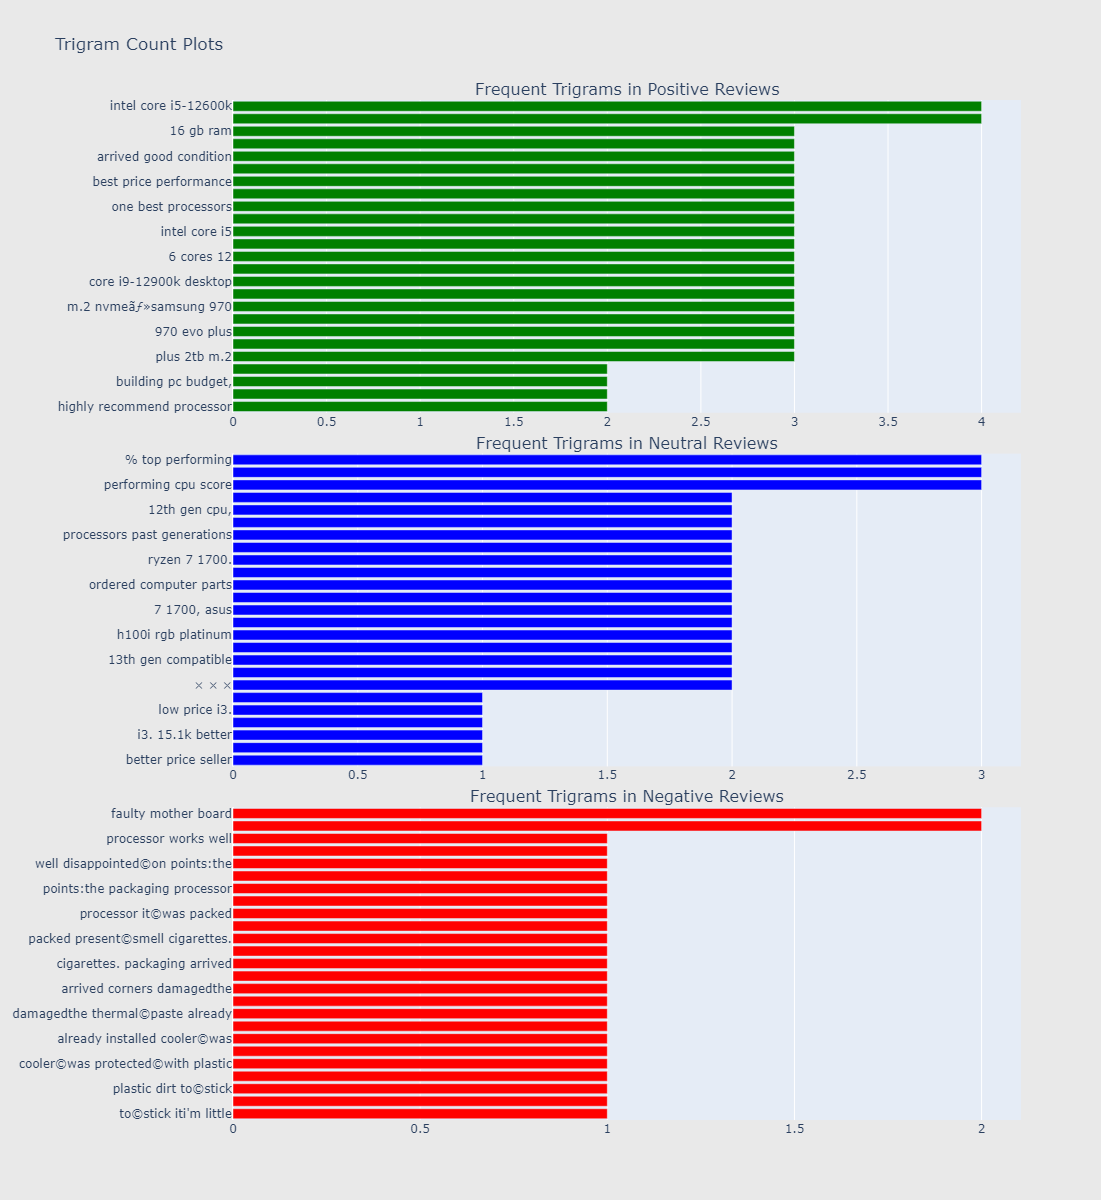

In [38]:
def generate_ngrams(text, n_gram=3):  # Changed n_gram default to 3 for trigrams
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# Custom function for horizontal bar chart
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation='h',
        marker=dict(
            color=color,
        ),
    )
    return trace

# Get the bar chart from positive reviews
freq_dict = defaultdict(int)
for sent in review_pos["text"]:
    for word in generate_ngrams(sent, n_gram=3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1], reverse=True))
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

# Get the bar chart from neutral reviews
freq_dict = defaultdict(int)
for sent in review_neu["text"]:
    for word in generate_ngrams(sent, n_gram=3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1], reverse=True))
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'blue')

# Get the bar chart from negative reviews
freq_dict = defaultdict(int)
for sent in review_neg["text"]:
    for word in generate_ngrams(sent, n_gram=3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1], reverse=True))
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')

# Creating subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent Trigrams in Positive Reviews", 
                                          "Frequent Trigrams in Neutral Reviews",
                                          "Frequent Trigrams in Negative Reviews"])

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)

fig.update_layout(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
fig.show()


In [ ]:
# In the above bar chart, we can clearly see the causes of negative sentiments. The most frequent issue highlighted here is "faulty motherboard".
# Another relevant issue is the "packaging".
# All other relevant issues are associated with the packaging, arrival and the condition of the product when arrived.

In [39]:
review_pos = df[df['sentiment_numeric'] == 2]
review_neu = df[df['sentiment_numeric'] == 1]
review_neg = df[df['sentiment_numeric'] == 0]

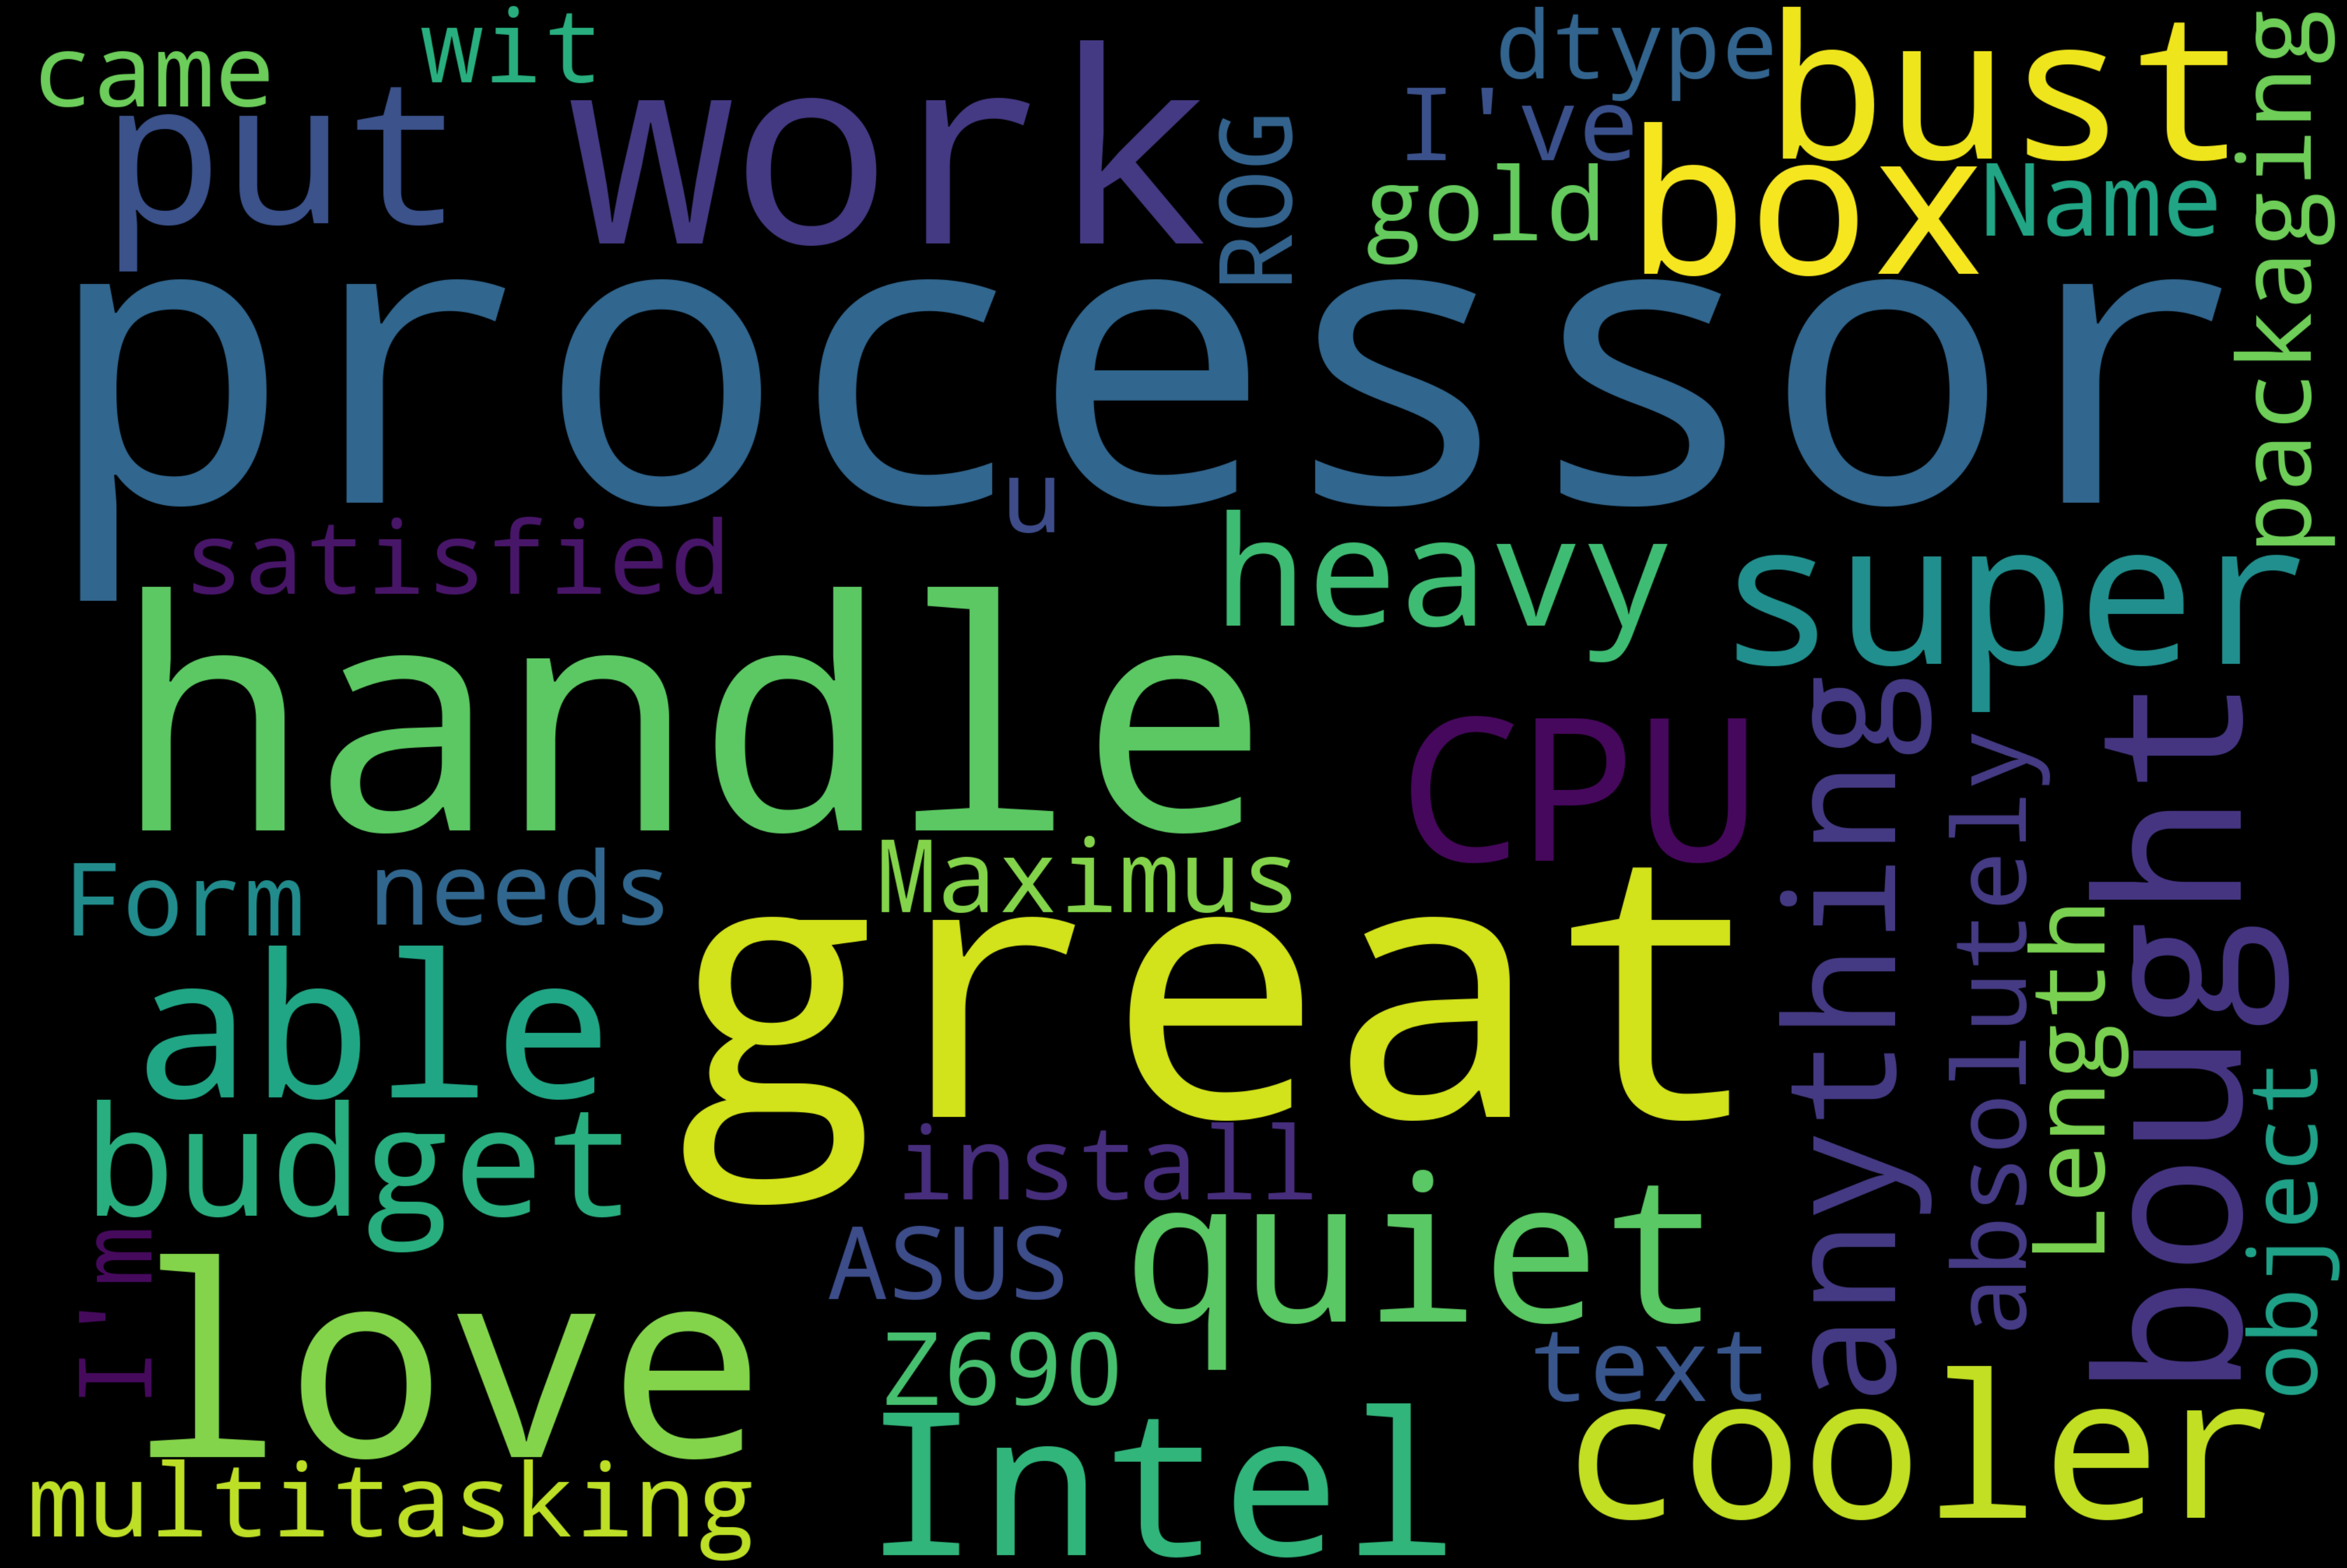

In [40]:
text = review_pos["text"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

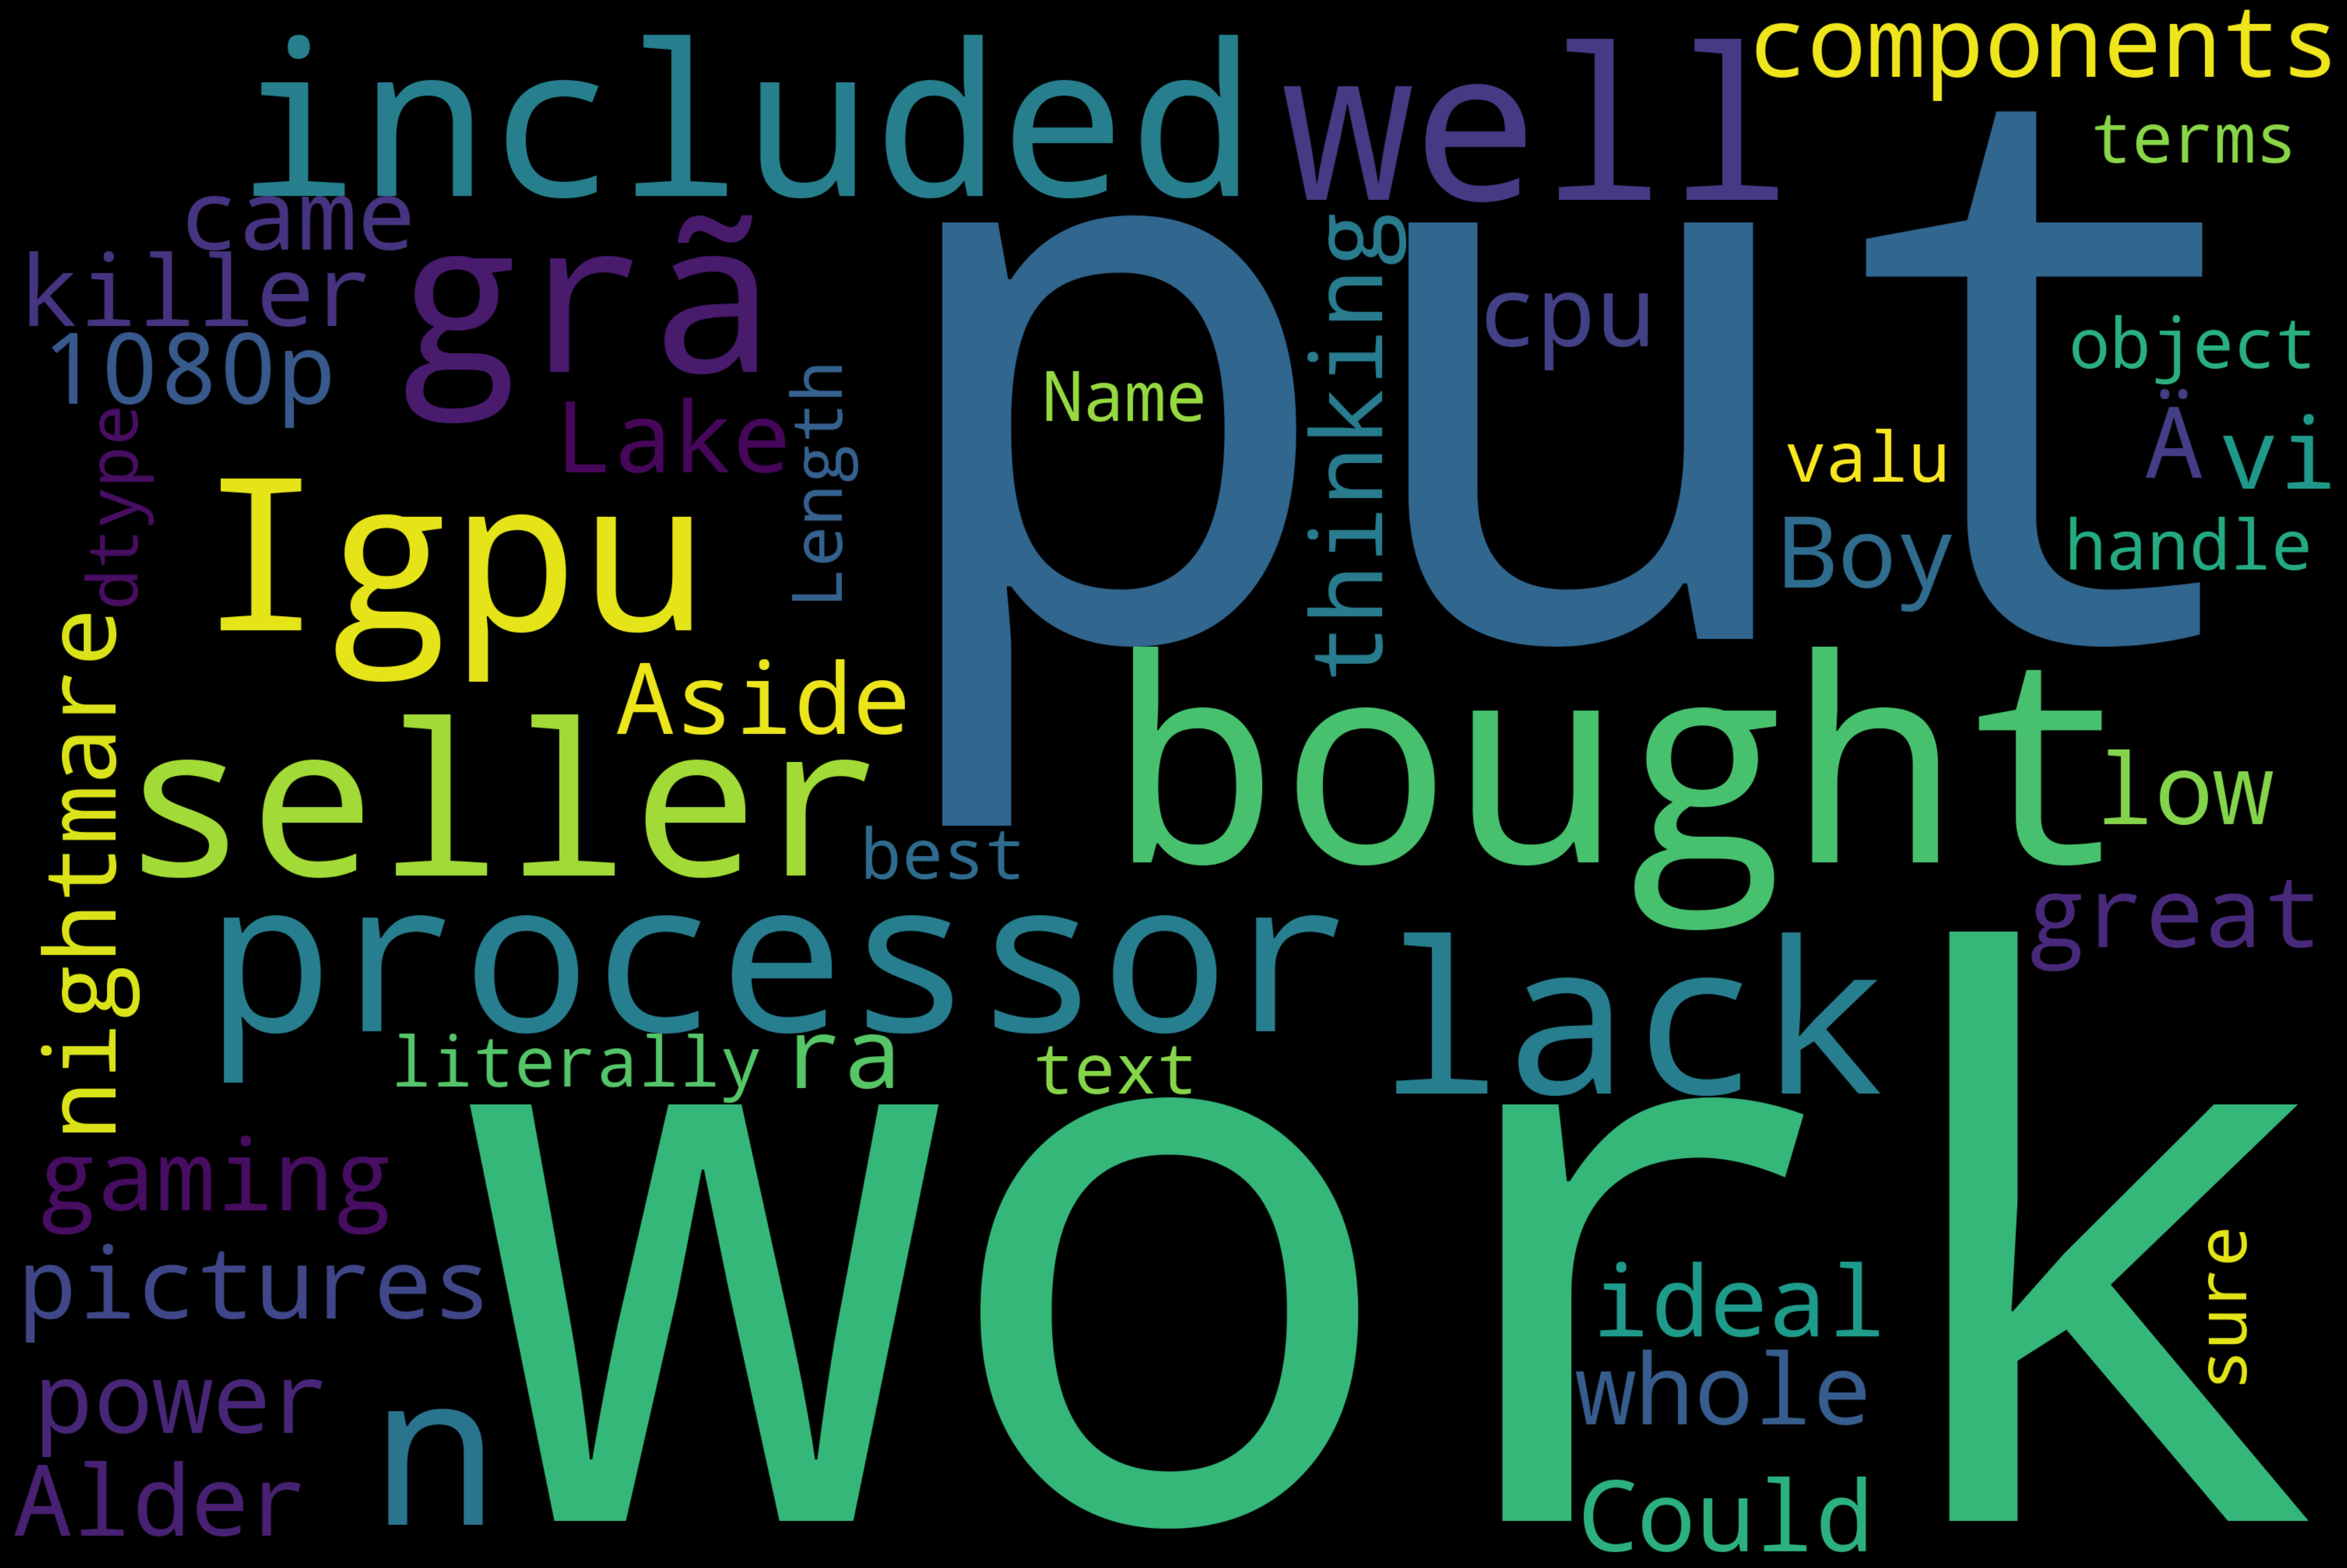

In [41]:
text = review_neg["text"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()